In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [77]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [78]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [79]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [80]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [81]:
# Create our session (link) from Python to the DB
session = Session(engine)

First Query:

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
query = session.query(Measurement.date, func.sum(Measurement.prcp)).group_by(Measurement.date).order_by(Measurement.id.desc()).limit(365).all()

In [83]:
#Let's import Pandas
import pandas as pd

In [84]:
#Create DF
precipitation = pd.DataFrame(query, columns=['Date', 'Precipitation'])
precipitation = precipitation.sort_index(ascending=True)
precipitation.head()

,Date,Precipitation
0,2014-09-06,1.76
1,2017-08-17,0.19
2,2017-08-16,0.61
3,2017-07-19,0.41
4,2017-05-26,0.02


In [85]:
#Now let's import Matplot to plot charts:
import matplotlib.pyplot as plt
import numpy as np

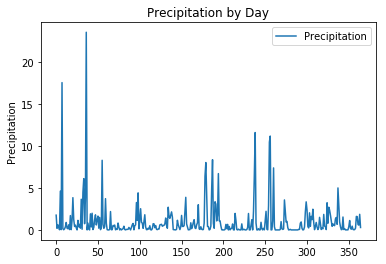

In [86]:
#Precipitation PLot!
precipitation.plot()
plt.title("Precipitation by Day")
plt.ylabel("Precipitation")
plt.show()

In [87]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,365.000000
mean,1.039068
std,2.212136
min,0.000000
25%,0.040000
50%,0.370000
75%,1.060000
max,23.590000


Second Query:

In [88]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(func.count(Station.id)).all()
stations_count

[(9)]

In [89]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [90]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temperature_query = [Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

tmp = session.query(*temperature_query).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
tmp

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [91]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_station = "USC00519281"

tobs = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.id.desc()).filter(Measurement.station == highest_station).limit(365).all()
    
tobs

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

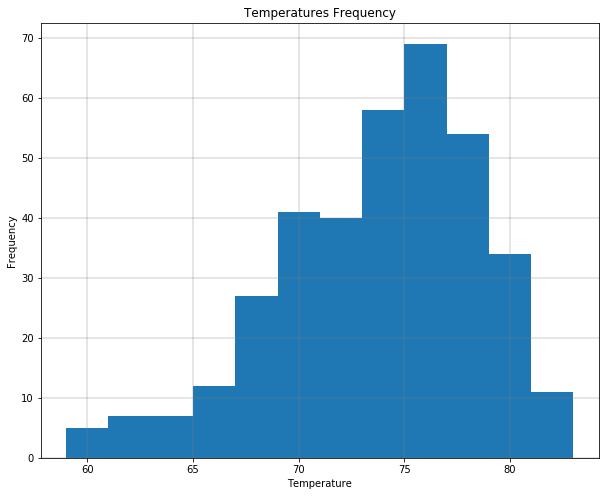

In [92]:
#Lets plot the Histogram
tobs_df = pd.DataFrame(tobs, columns=["Date", "Temperature Query"])

plt.figure(figsize=(10,8))
plt.hist(tobs_df["Temperature Query"], bins=12)
plt.grid(color='grey', linestyle='-', linewidth=2, alpha=.2)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("Temperatures Frequency")
#plt.savefig("../figures/TempHisto")
plt.show()

Third Query:

In [95]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))

variable = calc_temps('2012-02-28', '2012-03-05')
variable

[(62.0, 69.57142857142857, 74.0)]

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

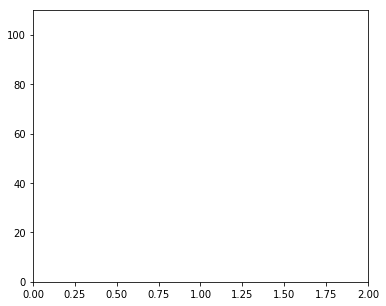

In [113]:
start_date = "2018-11-10"
end_date = "2018-11-24" 

temp_query = calc_temps("2012-02-28", "2012-03-05")

TMIN = temp_query[0][0]
TAVE = temp_query[0][1]
TMAX = temp_query[0][2]

plt.subplots(figsize=(6,5))
plt.xlim(0, 2)
plt.ylim([0,110])
plt.bar(TAVG, color = 'red', height = 1, yerr = TMAX-TMIN, tick_label="", align='center')
plt.ylabel("Temp")

plt.show()

#TMAX